# <font color='Yellow'>Importing Libraries</font>

In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm_notebook

In [2]:
warnings.filterwarnings('ignore')

# <font color='Yellow'>Loading Data</font>

### <font color='purple'>for Kaggle Notebook</font>

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

### <font color='purple'>for Jupyter Notebook</font>

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

### Training Data :
#### 42000 Rows & 785 Columns

#### 785 Columns = 1 Label + 28x28 pixel

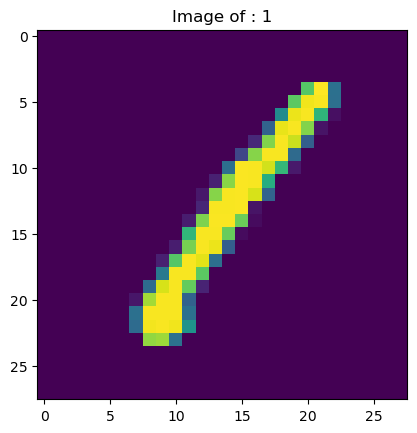

In [6]:
img = train.iloc[0, 1:]
img = np.array(img).reshape(28,28)
title = train['label'][0]
plt.imshow(img)
plt.title('Image of : ' + str(title))
plt.show()

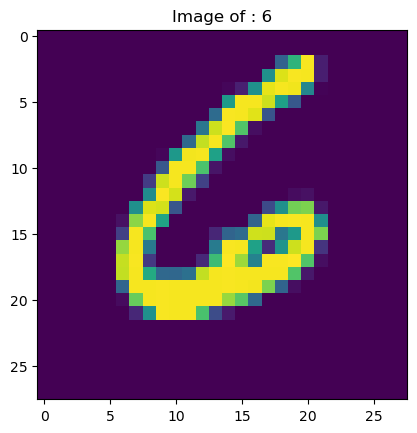

In [7]:
img = train.iloc[91, 1:]
img = np.array(img).reshape(28,28)
title = train['label'][91]
plt.imshow(img)
plt.title('Image of : ' + str(title))
plt.show()

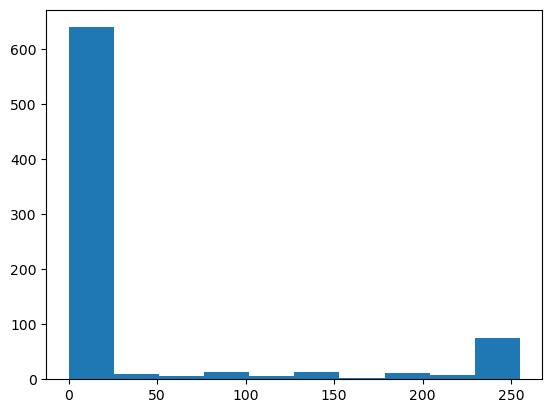

In [8]:
# Grey channel distribution

plt.hist(np.array(train.iloc[91, 1:]))
plt.show()

In [9]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.shape

(28000, 784)

In [11]:
missing_values_count = train.isnull().sum()
missing_values_count

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# <font color='Yellow'>Preparing Training & Testing Data</font>

In [12]:
x = np.array(train)
y = np.array(test)

In [13]:
x_train = x[:, 1:]
y_train = x[:, 0]
x_test = y

In [14]:
x_train = x_train.reshape(-1,28,28,1)                            # -1 in reshape means, it asks Python to decide the sizw/shape

# <font color='Cyan'>Generating Image Data</font>

In [15]:
datagen = ImageDataGenerator(
                rotation_range=15,
                zoom_range=0.1,
                shear_range=0.1,
                height_shift_range=0.1
            )

In [16]:
datagen.fit(x_train)

In [17]:
x_train = x_train.reshape(-1,784)

# <font color='Cyan'>Training Machine Learning Model</font>

In [18]:
knn = KNeighborsClassifier(5)

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

# <font color='Cyan'>Predicting Image</font>

In [20]:
prediction = knn.predict(y[100].reshape(1,-1))                                # predicting 100th row
print(int(prediction))

0


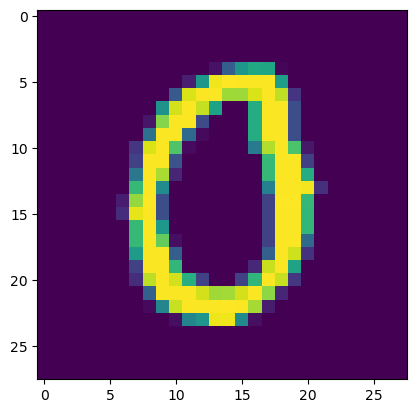

In [21]:
plt.imshow(np.array(y[100,:]).reshape(28,28))                                 # plotting 100th row
plt.show()

In [22]:
prediction = knn.predict(np.reshape(x_test[27365,], (1,-1)))                 # predicting 27365th row
print(int(prediction))

5


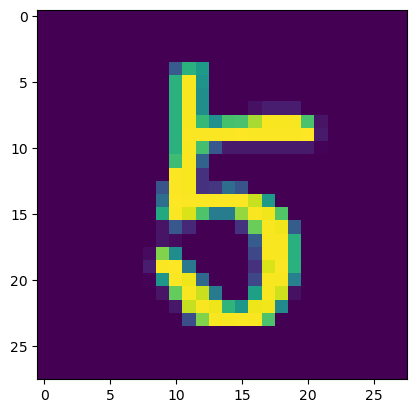

In [23]:
plt.imshow(np.array(np.reshape(x_test[27365,], (28,28))))                    # plotting 27365th row
plt.show()

In [24]:
prediction = knn.predict(x_test[9999,:].reshape(1,-1))                         # predicting 9999th row
print(int(prediction))

7


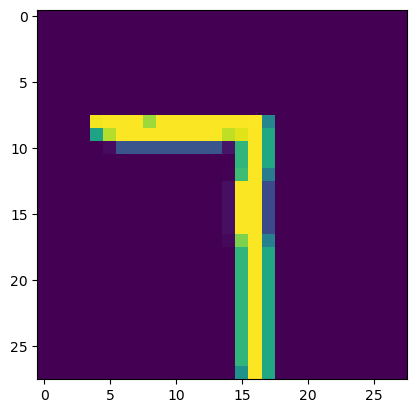

In [25]:
plt.imshow(np.array(np.reshape(y[9999,], (28,28))))                            # plotting 9999th row
plt.show()

In [26]:
ImageId = []
Label = []

for i in tqdm_notebook(range(y.shape[0]), desc = 'Progression : '):
    
    ImageId.append(i+1)
    
    l = knn.predict(y[i,:].reshape(1,-1))
    l = int(l)
    
    Label.append(l)

Progression :   0%|          | 0/28000 [00:00<?, ?it/s]

In [27]:
dic = {'ImageId' : ImageId, 'Label' : Label}

In [28]:
df = pd.DataFrame(dic)
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
df.to_csv('Digits.csv', index = False)